In [102]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
car_df = pd.read_csv('archive.zip')

In [7]:
car_df.columns = car_df.columns.str.lower().str.replace(' ', '_')
string_columns = list(car_df.dtypes[car_df.dtypes == 'object'].index)
for col in string_columns:
    car_df[col] = car_df[col].str.lower().str.replace(' ', '_')

In [8]:
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
engine_hp,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.00,1001.0
engine_cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.00,16.0
number_of_doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.00,4.0
highway_mpg,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city_mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
msrp,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


In [9]:
car_df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [13]:
cat_vars = ['object']
cat_df = car_df.select_dtypes(include=cat_vars)

In [15]:
#Most Frequent variables
for col in cat_df.columns:
    print(col, ':')
    print(car_df[col].value_counts().sort_values(ascending=False).head(5))
    print('-'*50)

make :
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64
--------------------------------------------------
model :
silverado_1500        156
tundra                140
f-150                 126
sierra_1500            90
beetle_convertible     89
Name: model, dtype: int64
--------------------------------------------------
engine_fuel_type :
regular_unleaded                  7172
premium_unleaded_(required)       2009
premium_unleaded_(recommended)    1523
flex-fuel_(unleaded/e85)           899
diesel                             154
Name: engine_fuel_type, dtype: int64
--------------------------------------------------
transmission_type :
automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64
--------------------------------------------------
driven_wheels :
front_wheel_drive    4787
rear_wheel_drive     3371
all

In [58]:
numerics = ['int64', 'float64']
num_df = car_df.select_dtypes(include=numerics)
num_df.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
0,2011,335.0,6.0,2.0,26,19,3916,46135
1,2011,300.0,6.0,2.0,28,19,3916,40650
2,2011,300.0,6.0,2.0,28,20,3916,36350
3,2011,230.0,6.0,2.0,28,18,3916,29450
4,2011,230.0,6.0,2.0,28,18,3916,34500


In [59]:
num_df = num_df.drop(['msrp'], axis=1)

In [60]:
cols = num_df.columns
cols

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [61]:
num_df['year'] = 2017 - num_df['year']

In [62]:
num_df.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,6,335.0,6.0,2.0,26,19,3916
1,6,300.0,6.0,2.0,28,19,3916
2,6,300.0,6.0,2.0,28,20,3916
3,6,230.0,6.0,2.0,28,18,3916
4,6,230.0,6.0,2.0,28,18,3916


In [63]:
num_df.isnull().sum()

year                 0
engine_hp           69
engine_cylinders    30
number_of_doors      6
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [64]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11914.0,6.615662,7.579740,0.0,1.0,2.0,10.0,27.0
engine_hp,11845.0,249.386070,109.191870,55.0,170.0,227.0,300.0,1001.0
engine_cylinders,11884.0,5.628829,1.780559,0.0,4.0,6.0,6.0,16.0
number_of_doors,11908.0,3.436093,0.881315,2.0,2.0,4.0,4.0,4.0
highway_mpg,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.0,354.0
city_mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.0,137.0
popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.0,5657.0


In [65]:
num_df.fillna(0, inplace=True)

In [66]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11914.0,6.615662,7.579740,0.0,1.0,2.0,10.0,27.0
engine_hp,11914.0,247.941749,110.507669,0.0,170.0,225.0,300.0,1001.0
engine_cylinders,11914.0,5.614655,1.800554,0.0,4.0,6.0,6.0,16.0
number_of_doors,11914.0,3.434363,0.884460,0.0,2.0,4.0,4.0,4.0
highway_mpg,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.0,354.0
city_mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.0,137.0
popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.0,5657.0


In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_df = scaler.fit_transform(num_df)

In [68]:
num_df = pd.DataFrame(num_df, columns=cols)

In [71]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11914.0,0.245025,0.280731,0.0,0.037037,0.074074,0.370370,1.0
engine_hp,11914.0,0.247694,0.110397,0.0,0.169830,0.224775,0.299700,1.0
engine_cylinders,11914.0,0.350916,0.112535,0.0,0.250000,0.375000,0.375000,1.0
number_of_doors,11914.0,0.858591,0.221115,0.0,0.500000,1.000000,1.000000,1.0
highway_mpg,11914.0,0.042800,0.025915,0.0,0.029240,0.040936,0.052632,1.0
city_mpg,11914.0,0.097948,0.069137,0.0,0.069231,0.084615,0.115385,1.0
popularity,11914.0,0.274609,0.254970,0.0,0.096729,0.244562,0.354907,1.0


In [88]:
X = num_df
y = np.log1p(car_df['msrp'].values)

In [89]:
X.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,0.222222,0.334665,0.375,0.5,0.040936,0.092308,0.692131
1,0.222222,0.299700,0.375,0.5,0.046784,0.092308,0.692131
2,0.222222,0.299700,0.375,0.5,0.046784,0.100000,0.692131
3,0.222222,0.229770,0.375,0.5,0.046784,0.084615,0.692131
4,0.222222,0.229770,0.375,0.5,0.046784,0.084615,0.692131


In [90]:
y[0:5]

array([10.73934884, 10.61277871, 10.50097699, 10.29048314, 10.44874359])

In [91]:
from sklearn.model_selection import train_test_split #split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print('-'*25)
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (9531, 7)
Shape of y_train: (9531,)
-------------------------
Shape of X_test: (2383, 7)
Shape of y_test: (2383,)


In [93]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_train)

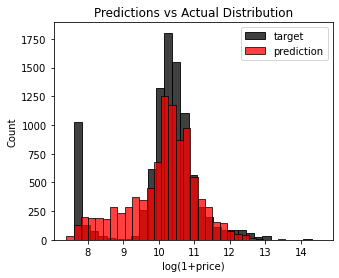

In [94]:
#let see the how good was the prediction
plt.figure(figsize=(5,4))

sns.histplot(y_train, label='target', color='black',bins=30)
sns.histplot(y_pred, label='prediction',color='red', bins=30)
plt.legend()
plt.xlabel('log(1+price)')
plt.ylabel('Count')
plt.title('Predictions vs Actual Distribution')

plt.show();

In [95]:
#RMSE
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.5164583338020942

In [96]:
#CV
lin_reg_cv_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_cv_scores)
lin_reg_rmse_scores.mean()

0.5180420905424017

In [97]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
price_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, price_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.06908834901196552

In [98]:
tree_reg_cv_scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)
tree_reg_rmse_scores = np.sqrt(-tree_reg_cv_scores)
tree_reg_rmse_scores.mean()

0.1422709854959153

In [99]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
price_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, price_predictions)
forest_rmse = np.sqrt(tree_mse)
forest_rmse

0.06908834901196552

In [100]:
forest_reg_cv_scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)
forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

0.12235134999527256

In [103]:
#hyper tuning of RF
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,
                           cv=10,
                          )

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [104]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.7349515 , 0.19459454, 0.03513006, 0.00279718, 0.00889349,
       0.01014302, 0.01349021])

In [106]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.11838455149087972

# Final Preparation

In [122]:
def cat_preparing_X(df):
    """
    Trying some more simple feature engineering.
    """
    df = df.copy()
    features = []
    
    for index in ['chevrolet', 'ford', 'volkswagen', 'toyota']:
        feature = 'is_make_%s' % index 
        df[feature] = (df['make'] == index).astype(int)
        features.append(feature)
        
    for index in ['regular_unleaded', 'premium_unleaded_(required)',
                  'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % index
        df[feature] = (df['engine_fuel_type'] == index).astype(int)
        features.append(feature)
    
    for index in ['automatic', 'manual', 'automated_manual', 'direct_drive']:
        feature = 'is_tranmission_%s' % index
        df[feature] = (df['transmission_type'] == index).astype(int)
        features.append(feature)
    
    for index in ['crossover', 'flex_fuel', 'luxury', 'luxury,performance']:
        feature = 'is_market_category_%s' % index
        df[feature] = (df['market_category'] == index).astype(int)
        features.append(feature)

    df = df[features]
    df = df.fillna(0)
    return df

In [123]:
cat_df.isnull().sum()

make                    0
model                   0
engine_fuel_type        3
transmission_type       0
driven_wheels           0
market_category      3742
vehicle_size            0
vehicle_style           0
dtype: int64

In [124]:
cat_df = cat_preparing_X(cat_df)

In [125]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   is_make_chevrolet                       11914 non-null  int32
 1   is_make_ford                            11914 non-null  int32
 2   is_make_volkswagen                      11914 non-null  int32
 3   is_make_toyota                          11914 non-null  int32
 4   is_type_regular_unleaded                11914 non-null  int32
 5   is_type_premium_unleaded_(required)     11914 non-null  int32
 6   is_type_premium_unleaded_(recommended)  11914 non-null  int32
 7   is_type_flex-fuel_(unleaded/e85)        11914 non-null  int32
 8   is_tranmission_automatic                11914 non-null  int32
 9   is_tranmission_manual                   11914 non-null  int32
 10  is_tranmission_automated_manual         11914 non-null  int32
 11  is_tranmission_

In [127]:
numerics = ['int64', 'float64']
num_df = car_df.select_dtypes(include=numerics)
num_df = num_df.drop(['msrp'], axis=1)
cols = num_df.columns
num_df['year'] = 2017 - num_df['year']
num_df.fillna(0, inplace=True)
num_df.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,6,335.0,6.0,2.0,26,19,3916
1,6,300.0,6.0,2.0,28,19,3916
2,6,300.0,6.0,2.0,28,20,3916
3,6,230.0,6.0,2.0,28,18,3916
4,6,230.0,6.0,2.0,28,18,3916


In [128]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              11914 non-null  int64  
 1   engine_hp         11914 non-null  float64
 2   engine_cylinders  11914 non-null  float64
 3   number_of_doors   11914 non-null  float64
 4   highway_mpg       11914 non-null  int64  
 5   city_mpg          11914 non-null  int64  
 6   popularity        11914 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 651.7 KB


In [130]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11914.0,6.615662,7.579740,0.0,1.0,2.0,10.0,27.0
engine_hp,11914.0,247.941749,110.507669,0.0,170.0,225.0,300.0,1001.0
engine_cylinders,11914.0,5.614655,1.800554,0.0,4.0,6.0,6.0,16.0
number_of_doors,11914.0,3.434363,0.884460,0.0,2.0,4.0,4.0,4.0
highway_mpg,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.0,354.0
city_mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.0,137.0
popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.0,5657.0


In [131]:
scaler = MinMaxScaler()
num_df = scaler.fit_transform(num_df)
num_df = pd.DataFrame(num_df, columns=cols)

In [132]:
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11914.0,0.245025,0.280731,0.0,0.037037,0.074074,0.370370,1.0
engine_hp,11914.0,0.247694,0.110397,0.0,0.169830,0.224775,0.299700,1.0
engine_cylinders,11914.0,0.350916,0.112535,0.0,0.250000,0.375000,0.375000,1.0
number_of_doors,11914.0,0.858591,0.221115,0.0,0.500000,1.000000,1.000000,1.0
highway_mpg,11914.0,0.042800,0.025915,0.0,0.029240,0.040936,0.052632,1.0
city_mpg,11914.0,0.097948,0.069137,0.0,0.069231,0.084615,0.115385,1.0
popularity,11914.0,0.274609,0.254970,0.0,0.096729,0.244562,0.354907,1.0


In [143]:
X = pd.concat([num_df, cat_df], axis=1)
y = np.log1p(car_df['msrp'].values)

In [144]:
pd.set_option('display.max_rows', None)

In [145]:
X.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,is_make_chevrolet,is_make_ford,is_make_volkswagen,...,is_type_premium_unleaded_(recommended),is_type_flex-fuel_(unleaded/e85),is_tranmission_automatic,is_tranmission_manual,is_tranmission_automated_manual,is_tranmission_direct_drive,is_market_category_crossover,is_market_category_flex_fuel,is_market_category_luxury,"is_market_category_luxury,performance"
0,0.222222,0.334665,0.375,0.5,0.040936,0.092308,0.692131,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.222222,0.299700,0.375,0.5,0.046784,0.092308,0.692131,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.222222,0.299700,0.375,0.5,0.046784,0.100000,0.692131,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.222222,0.229770,0.375,0.5,0.046784,0.084615,0.692131,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.222222,0.229770,0.375,0.5,0.046784,0.084615,0.692131,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [146]:
X.isnull().sum()

year                                      0
engine_hp                                 0
engine_cylinders                          0
number_of_doors                           0
highway_mpg                               0
city_mpg                                  0
popularity                                0
is_make_chevrolet                         0
is_make_ford                              0
is_make_volkswagen                        0
is_make_toyota                            0
is_type_regular_unleaded                  0
is_type_premium_unleaded_(required)       0
is_type_premium_unleaded_(recommended)    0
is_type_flex-fuel_(unleaded/e85)          0
is_tranmission_automatic                  0
is_tranmission_manual                     0
is_tranmission_automated_manual           0
is_tranmission_direct_drive               0
is_market_category_crossover              0
is_market_category_flex_fuel              0
is_market_category_luxury                 0
is_market_category_luxury,perfor

In [147]:
from sklearn.model_selection import train_test_split #split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_train)

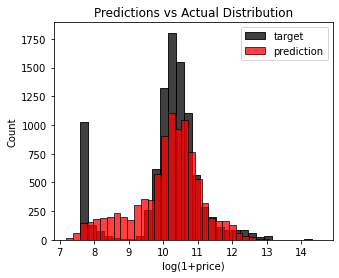

In [149]:
#let see the how good was the prediction
plt.figure(figsize=(5,4))

sns.histplot(y_train, label='target', color='black',bins=30)
sns.histplot(y_pred, label='prediction',color='red', bins=30)
plt.legend()
plt.xlabel('log(1+price)')
plt.ylabel('Count')
plt.title('Predictions vs Actual Distribution')

plt.show();

In [150]:
lin_mse = mean_squared_error(y_train, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.4698198592595307

In [151]:
lin_reg_cv_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)
lin_reg_rmse_scores = np.sqrt(-lin_reg_cv_scores)
lin_reg_rmse_scores.mean()

0.4741214391143681

In [153]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, price_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.06479186054514156

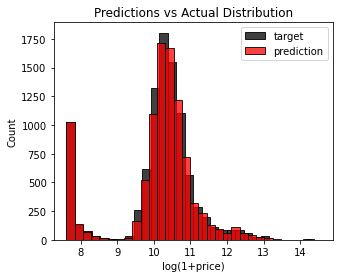

In [154]:
#let see the how good was the prediction
plt.figure(figsize=(5,4))

sns.histplot(y_train, label='target', color='black',bins=30)
sns.histplot(y_pred, label='prediction',color='red', bins=30)
plt.legend()
plt.xlabel('log(1+price)')
plt.ylabel('Count')
plt.title('Predictions vs Actual Distribution')

plt.show();

In [155]:
tree_reg_cv_scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)
tree_reg_rmse_scores = np.sqrt(-tree_reg_cv_scores)
tree_reg_rmse_scores.mean()

0.12913530047109556

In [166]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, price_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.07055448055173379

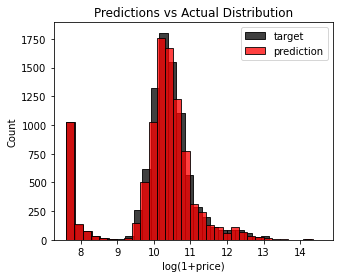

In [158]:
#let see the how good was the prediction
plt.figure(figsize=(5,4))

sns.histplot(y_train, label='target', color='black',bins=30)
sns.histplot(y_pred, label='prediction',color='red', bins=30)
plt.legend()
plt.xlabel('log(1+price)')
plt.ylabel('Count')
plt.title('Predictions vs Actual Distribution')

plt.show();

In [159]:
forest_reg_cv_scores = cross_val_score(forest_reg, X_train, y_train, scoring='neg_mean_squared_error', cv = 10)
forest_reg_rmse_scores = np.sqrt(-forest_reg_cv_scores)
forest_reg_rmse_scores.mean()

0.11608487450326206

In [160]:
#hyper tuning of RF
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, scoring='neg_mean_squared_error', return_train_score=True, cv=10,)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [161]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([5.06917725e-01, 1.91350060e-01, 3.23844578e-02, 8.70641228e-03,
       3.02720495e-02, 3.18410250e-02, 1.32149858e-02, 7.80214627e-04,
       3.92953985e-04, 3.48320159e-04, 5.18421912e-04, 6.25743870e-02,
       6.08740516e-02, 5.20277870e-03, 1.21956641e-03, 7.15030612e-03,
       3.73911656e-02, 6.66338316e-04, 5.01588797e-05, 1.84877557e-03,
       1.40956792e-03, 3.29207467e-03, 1.59420271e-03])

In [162]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.11098764417254152

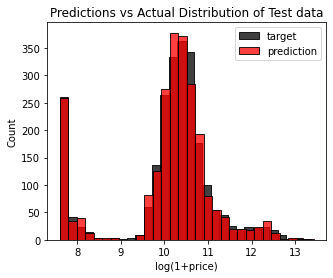

In [163]:
plt.figure(figsize=(5,4))

sns.histplot(y_test, label='target', color='black',bins=30)
sns.histplot(final_predictions, label='prediction',color='red', bins=30)
plt.legend()
plt.xlabel('log(1+price)')
plt.ylabel('Count')
plt.title('Predictions vs Actual Distribution of Test data')

plt.show();

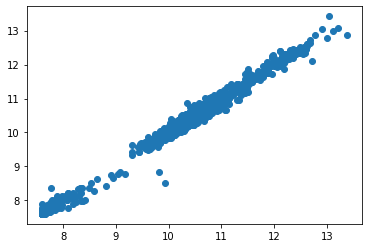

In [165]:
plt.scatter(y_test, final_predictions);

# Save the Model

In [164]:
import pickle 
file = open('model.pkl', 'wb') # open a file, where you ant to store the data
pickle.dump(final_model, file) #dump information to that file